Practical 11 - 5/04/24

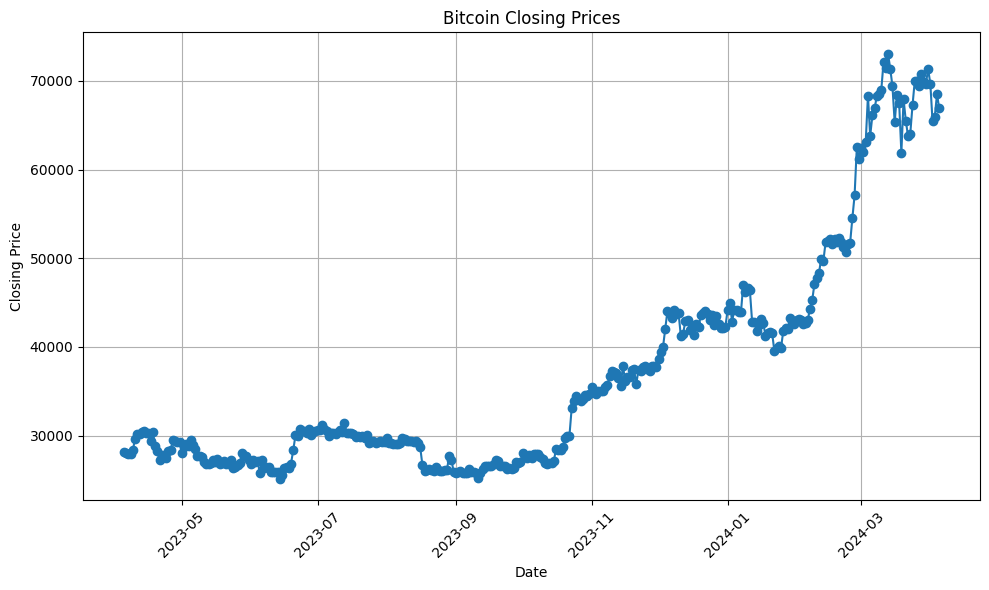

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('Bitcoinprice.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-')
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
#! pip install statsmodels

In [6]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import r2_score

# 'Date'column  as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split data into train and test sets (use last 20% as test)
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Fit AR models of orders 3 and 4
order_3_model = AutoReg(train_data['Close'], lags=3).fit()
order_4_model = AutoReg(train_data['Close'], lags=4).fit()

# Predictions
order_3_pred = order_3_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
order_4_pred = order_4_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate R^2 scores
r2_order_3 = r2_score(test_data['Close'], order_3_pred)
r2_order_4 = r2_score(test_data['Close'], order_4_pred)

print("R^2 for order 3 model:", r2_order_3)
print("R^2 for order 4 model:", r2_order_4)

R^2 for order 3 model: -2.6560911577218644
R^2 for order 4 model: -2.716575439078008


c:\Users\35796\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\35796\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\35796\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\Users\35796\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, D